<a href="https://colab.research.google.com/github/ATM10919/OCT/blob/main/OCT_notebook_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

anirudhcv_labeled_optical_coherence_tomography_oct_path = kagglehub.dataset_download('anirudhcv/labeled-optical-coherence-tomography-oct')
akashchowdhury109_inception_weight_path = kagglehub.dataset_download('akashchowdhury109/inception-weight')

print('Data source import complete.')


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import os
import random

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics

import tensorflow_addons as tfa
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [ ]:
data_dir = '../input/labeled-optical-coherence-tomography-oct/Dataset - train+val+test'
data = tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 109309 files belonging to 3 classes.


In [ ]:
base_dir = os.path.join("../input/labeled-optical-coherence-tomography-oct/Dataset - train+val+test/")
print('Base directory --> ', os.listdir(base_dir))

Base directory -->  ['val', 'test', 'train']


In [ ]:
# Test and Val name exchanged

train_dir = os.path.join(base_dir + "train/")
print("Train Directory --> ", os.listdir(train_dir))

validation_dir = os.path.join(base_dir + "test/")
print("Validation Directory --> ", os.listdir(validation_dir))

test_dir = os.path.join(base_dir + "val/")
print("Test Directory --> ", os.listdir(test_dir))

Train Directory -->  ['DRUSEN', 'CNV', 'NORMAL', 'DME']
Validation Directory -->  ['DRUSEN', 'CNV', 'NORMAL', 'DME']
Test Directory -->  ['DRUSEN', 'CNV', 'NORMAL', 'DME']


In [ ]:
weights="/kaggle/input/inception-weight/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [ ]:
from tensorflow.keras.applications import InceptionV3
inc = InceptionV3(input_shape=(224,224,3),weights=weights,include_top=False)
for i in inc.layers:
    i.trainable = False
print(inc.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
model = tf.keras.models.Sequential([
    inc,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation = 'softmax')
])

In [ ]:
metrics = ['accuracy',
                tf.keras.metrics.AUC(),
                tfa.metrics.CohenKappa(num_classes = 4),
                tfa.metrics.F1Score(num_classes = 4),
                tf.keras.metrics.Precision(),
                tf.keras.metrics.Recall()]
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = metrics)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 4)                 204804    
Total params: 22,007,588
Trainable params: 204,804
Non-trainable params: 21,802,784
_________________________________________________________________
None


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size = (224,224), class_mode = 'categorical',
    batch_size = 500)

Found 76515 images belonging to 4 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size = (224,224), class_mode = 'categorical', shuffle=False,
    batch_size = 50)

Found 21861 images belonging to 4 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, target_size = (224,224), class_mode = 'categorical',
    batch_size = 16)

Found 10933 images belonging to 4 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = (76515//500),
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = (10933//16),
    max_queue_size=100,
    workers = 4 ,
    verbose = 1)

Epoch 1/30
153/153 [==============================] - 263s 2s/step - loss: 3.1766 - accuracy: 0.7144 - auc: 0.8611 - cohen_kappa: 0.5552 - f1_score: 0.5772 - precision: 0.7221 - recall: 0.7071 - val_loss: 0.4271 - val_accuracy: 0.8745 - val_auc: 0.9727 - val_cohen_kappa: 0.7982 - val_f1_score: 0.7495 - val_precision: 0.8809 - val_recall: 0.8698
Epoch 2/30
153/153 [==============================] - 190s 1s/step - loss: 0.3930 - accuracy: 0.8824 - auc: 0.9753 - cohen_kappa: 0.8156 - f1_score: 0.7927 - precision: 0.8898 - recall: 0.8762 - val_loss: 0.3077 - val_accuracy: 0.8984 - val_auc: 0.9827 - val_cohen_kappa: 0.8407 - val_f1_score: 0.8127 - val_precision: 0.9058 - val_recall: 0.8934
Epoch 3/30
153/153 [==============================] - 189s 1s/step - loss: 0.2558 - accuracy: 0.9140 - auc: 0.9872 - cohen_kappa: 0.8652 - f1_score: 0.8473 - precision: 0.9199 - recall: 0.9087 - val_loss: 0.2862 - val_accuracy: 0.9046 - val_auc: 0.9847 - val_cohen_kappa: 0.8508 - val_f1_score: 0.8280 - va

metrics of VGG-19


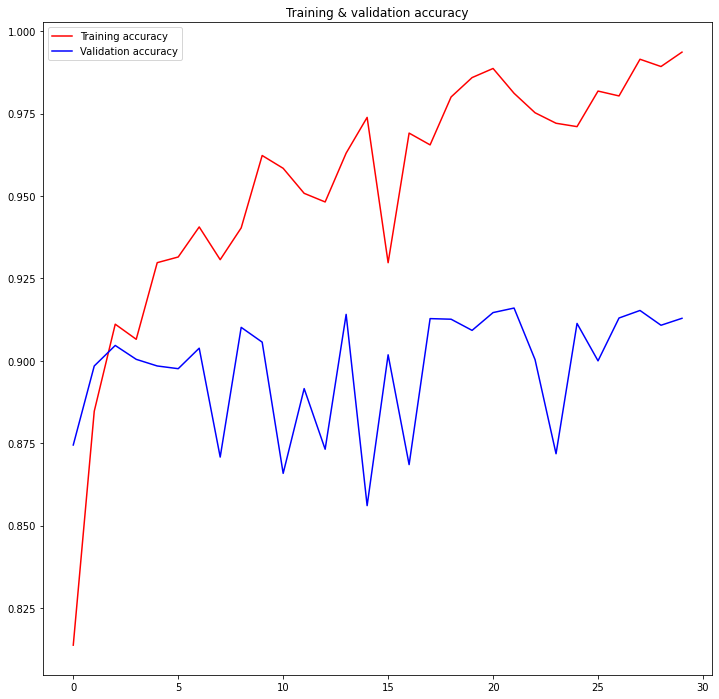

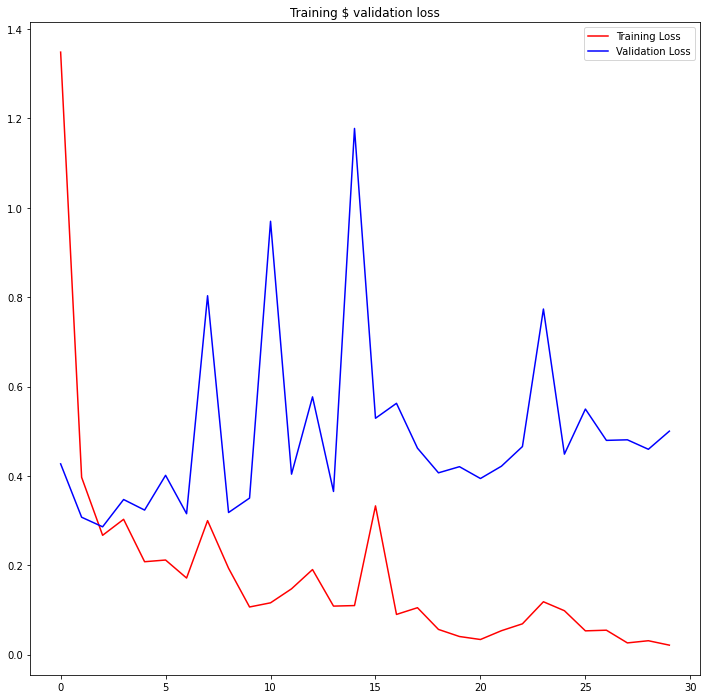

In [ ]:
print("metrics of VGG-19")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12,12))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training & validation accuracy')
plt.legend()

plt.figure(figsize = (12,12))

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training $ validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(test_generator)

438/438 [==============================] - 197s 450ms/step - loss: 0.4979 - accuracy: 0.9117 - auc: 0.9722 - cohen_kappa: 0.8604 - f1_score: 0.8338 - precision: 0.9131 - recall: 0.9110


[0.49786272644996643,
 0.9117149114608765,
 0.9721952676773071,
 0.8604359030723572,
 array([0.9309965, 0.8275558, 0.6206657, 0.9558936], dtype=float32),
 0.9130753874778748,
 0.9110288023948669]

In [ ]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = model.predict(test_generator, steps = test_steps_per_epoch)

predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

In [ ]:
report = sklearn.metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

              precision    recall  f1-score   support

         CNV       0.91      0.96      0.93      7491
         DME       0.85      0.81      0.83      2319
      DRUSEN       0.81      0.50      0.62      1773
      NORMAL       0.94      0.97      0.96     10278

    accuracy                           0.91     21861
   macro avg       0.87      0.81      0.83     21861
weighted avg       0.91      0.91      0.91     21861



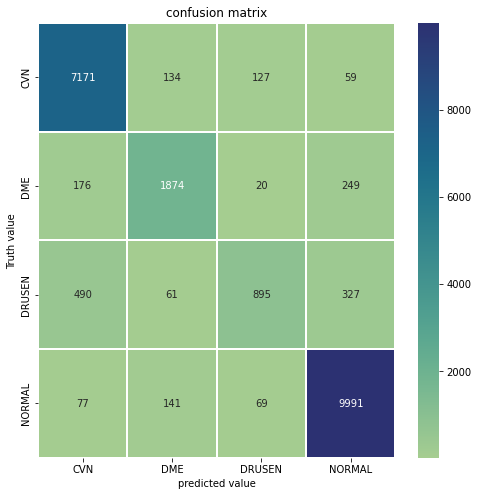

[[7171  134  127   59]
 [ 176 1874   20  249]
 [ 490   61  895  327]
 [  77  141   69 9991]]


In [ ]:
X_Label = ['CVN','DME','DRUSEN','NORMAL']
Y_Label = ['CVN','DME','DRUSEN','NORMAL']

cm = sklearn.metrics.confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8,8))
sns.heatmap(cm, fmt='.0f', cmap="crest", annot=True, linewidths=0.2, xticklabels=X_Label, yticklabels=Y_Label)
plt.title('confusion matrix')
plt.xlabel('predicted value')
plt.ylabel('Truth value')
plt.show()
print(sklearn.metrics.confusion_matrix(true_classes, predicted_classes))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


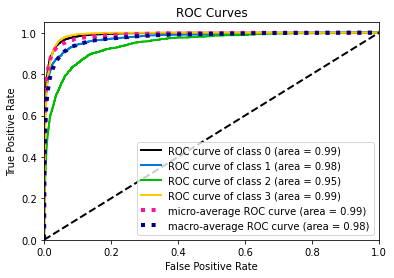

In [ ]:
import scikitplot as skplt

y_true = true_classes
y_probas = predictions
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

In [ ]:
print("Accuracy", sklearn.metrics.accuracy_score(true_classes, predicted_classes))

Accuracy 0.9117149261241481
